# 머신러닝의 종류
* 지도학습 - 데이터와 정답을 이용해서 패턴/규칙 파악
* 비지도 학습 - 데이터만을 이용해서 유사도에 따른 패턴/규칙 파악
    + 비지도학습의 대표적인 분석방법 : 군집

## k-means
* 서로 유사성이 높은 것끼리 관측값을 묶어 다수의 그룹으로 만듦
* 즉, 동일 그룹내 구성원간의 유사성은 높지만 다른 그룹의 구성원과의 유사성은 거의 없도록 하는 것
    + 군집분석 SSW, SSB
* 활용분야
    + 소비자유형 파악 - 타겟 마케팅 적용
    + 범죄율이 높은 지역 검출
    + 이미지/얼굴/손글씨 인식 - SVM
    + 유전자 검사/지리정보를 이용해서 지형 탐사

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## kmeans 알고리즘 이해

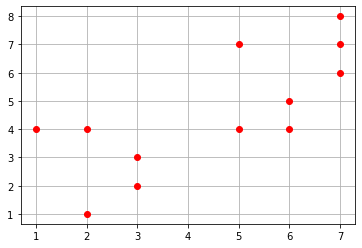

In [4]:
x = 7,2,6,3,6,5,3,1,5,7,7,2
y = 8,4,4,2,5,7,3,4,4,7,6,1

plt.plot(x, y, 'ro')
plt.grid(True)

# 유사도 파악 
- k-means 에서는 각 점간의 거리로 
- 비슷한 특성을 가지는 데이터를 묶음
- 따라서, 유사도 측정을 위해 임의의 기준점 선정
- 기준점과 각 점간의 거리 계산
    - 유클리드 거리 계산법
    - 즉, A(x1, y1), B(x2, y2) 간의 거리 계산은
      sqrt((x2-x1)**2+(y2-y1)**2) 로 함

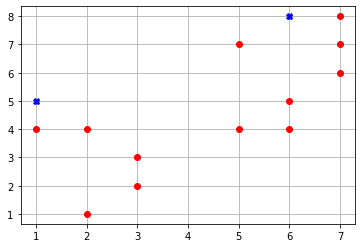

In [5]:
# 기준점 선정 및 시각화
# C1, C2 = (1,5), (6,8)

plt.plot(x, y, 'ro')
plt.plot([1,6], [5,8], 'bX')
plt.grid()

In [6]:
import math

# P(5,7)은 C1 또는 C2로 분류될지 알아봄
#            C1(1,5)            C2(6,8)
# 5,7
print('P - C1 : ', math.sqrt( (5-1)**2 + (7-5)**2 ))
print('P - C2 : ', math.sqrt( (5-6)**2 + (7-8)**2 ))

P - C1 :  4.47213595499958
P - C2 :  1.4142135623730951


# 모든 데이터에 대한 군집화가 수행된 후 
* 새로운 센터노이드를 선정한 후 다시 유사도에 의한 군집 실시
* 새로운 센터노이드를 선정하는 방법은 각 군집별 평균값을 이용
* 즉, 군집 C1, C2의 각 X, Y 좌표간의 평균 계산

In [7]:
# C1의 새로운 센터노이드 지정
# 새로운 x좌표 : 1,2,2,3,3 / 5 = 2.2
# 새로운 y좌표 : 1,2,3,4,4 / 5 = 2.8

# C2의 새로운 센터노이드 지정
# 새로운 x좌표 : 5,5,6,6,7,7,7 / 7 = 6.14
# 새로운 y좌표 : 4,4,5,6,7,7,8 / 7 = 5.85

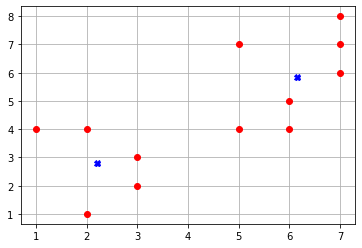

In [8]:
plt.plot(x, y, 'ro')
plt.plot([2.2, 6.14], [2.8, 5.85], 'bX')
plt.grid()

# (iris)데이터 읽기

In [9]:
from sklearn.datasets import load_iris

iris = load_iris()
data = iris.data
target = iris.target

# 군집

In [10]:
km = KMeans(
    n_clusters = 3      # 하이퍼 파라미터(클러스터 개수)
    , max_iter = 200    # 클러스터 중심 이동 최대 반복 횟수
    , n_init = 10       # 클러스터 중심 이동 반복 횟수??
    )

km.fit(data)

np.unique(
    km.labels_                # 클러스터 인덱스
    , return_counts = True    # 클러스터별 개수
    )

(array([0, 1, 2], dtype=int32), array([38, 50, 62]))

## 실루엣/엘보우 계수
* iris 데이터셋 경우, 각 관측값에 대한 레이블을 알고 있기 때문에 군집성공에 대한 정확도 파악 가능
* 하지만, 레이블이 없는 데이터의 경우 ``실루엣 계수`` 와 ``엘보우 그래프(SSE)`` 를 통해 적절한 군집 계수를 파악해야 함
* 실루엣 계수 : 군집 적합도를 수치로 나타낸 것으로 1에 가까울수록 군집이 잘된 것으로 파악
* 엘보우SSE 계수 : 군집내 오차제곱합을 의미


In [12]:
silhouette_score(data, km.labels_, metric='euclidean')

0.5528190123564095

In [14]:
km.inertia_

78.851441426146

## 적절한 군집 갯수 찾기
+ 실루엣/엘보우 그래프 이용

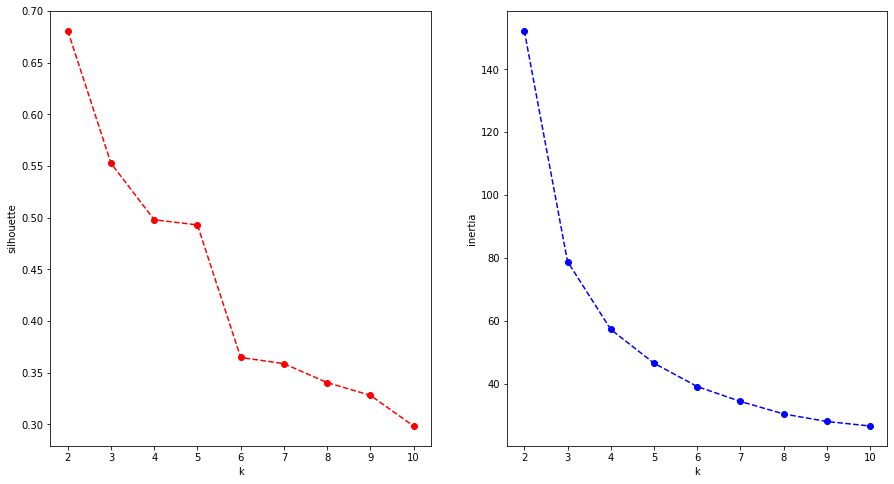

In [15]:
silhouette = []    # 실루엣 계수
inertia = []       # 엘보우 계수

for k in range(2, 10+1):
   km = KMeans(n_clusters=k)   # 하이퍼파라미터
   km.fit( data )

   silhouette.append( silhouette_score( data, km.labels_, metric='euclidean') )
   inertia.append(km.inertia_)

# 시각화 - 선
plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)
plt.plot(range(2, 10+1), silhouette, 'ro--')
plt.xlabel('k')
plt.ylabel('silhouette')

plt.subplot(1, 2, 2)
plt.plot(range(2, 10+1), inertia, 'bo--')
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

## 군집결과 확인 : sepal length/width

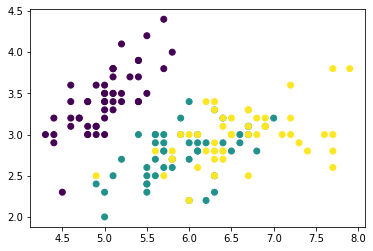

In [18]:
# 원래의 분류 결과 데이터
plt.scatter(data[:, 0], data[:, 1], c=target)
plt.show()

In [ ]:
km.cluster_centers_

In [ ]:
centers = pd.DataFrame(km.cluster_centers_, columns=['sl', 'sw', 'pl', 'pw'])

x, y = centers.sl, centers.sw

plt.scatter(data[:, 0], data[:, 1], c=km.labels_)
plt.scatter(x, y, marker='X', c='r', s=100)  # 중심점 표시
plt.show()

## 군집결과 확인 : petal length/width

In [ ]:
x, y = centers.pl, centers.pw

plt.scatter(data[:, 2], data[:, 3], c=km.labels_)
plt.scatter(x, y, marker='X', c='r')  # 중심점 표시

plt.show()

In [ ]:
from kmeans_eval import visualize_silhouette # 머신러닝 폴더에 kmeans_eval 넣어놓기
# visualize_silhouette(군집수, 군집할데이터)

visualize_silhouette([2,3,4,5,6], data)

# 그래프 상에서는 빨간선에 각 군집별 모양이 넘치거나 모자라지 않는 형태가 가장 이상적임
# 군집별 두께가 일정한가
# 각 군집이 빨간점선에 가깝게 있는가

## 고객데이터를 이용해서 타겟마케팅을 위한 군집 예제
* Customer ID, ItemsBought, ItemsReturned, ZipCode, Product
* 이중에서 ItemsBought, ItemsReturned을 이용해서 적절히 군집을 수행하세요
    + 제품을 많이/작게 사고 반품이 없는/있는 고객


In [ ]:
## 과일, 채소 구분하기